# Proyek Analisis Data: Capital Bikeshare Bike Sharing Dataset
---
- Name: Rafli Ardiansyah
- Email: rrapliard@gmail.com
- ID Dicoding: mikachuu

## 1. Menentukan Pertanyaan Bisnis
---

1. Bagaimana tren jumlah pengguna sepeda dalam beberapa tahun terakhir?
2. Bagaimana pola penggunaan layanan bike-sharing berdasarkan waktu?
3. Pada musim apa saja jumlah pengguna layanan bike-sharing tertinggi?
4. Bagaimana pola penggunaan layanan bike-sharing berdasarkan hari dalam seminggu?
5. Apakah ada korelasi antara suhu yang mengindikasikan kondisi ketika penggunaan layanan bike-sharing tinggi?
6. Apakah cuaca mempengaruhi penggunaan bikeshare?

## Menyiapkan Library yang dibutuhkan
---

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Data Wrangling


### Data Gathering

In [81]:
hour_df = pd.read_csv("https://raw.githubusercontent.com/bulgogipedas/bike-sharing-analysis/main/datasets/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


- instant: indeks catatan
	- dteday : tanggal
	- season : musim (1: musim dingin, 2: musim semi, 3: musim panas, 4: musim gugur)
	- yr : tahun (0: 2011, 1: 2012)
	- bulan : bulan (1 sampai 12)
	- hr : jam (0 hingga 23)
	- holiday : hari cuaca hari libur atau tidak (diambil dari http://dchr.dc.gov/page/holiday-schedule)
	- hari kerja : hari dalam seminggu
	- hari kerja : jika hari tersebut bukan akhir pekan atau hari libur maka nilainya 1, jika tidak maka nilainya 0.
	+ cuaca : 
		- 1: Cerah, Sedikit awan, Berawan sebagian, Berawan sebagian
		- 2: Kabut + Berawan, Kabut + Awan pecah, Kabut + Sedikit awan, Kabut
		- 3: Salju Ringan, Hujan Ringan + Badai Petir + Awan berserakan, Hujan Ringan + Awan berserakan
		- 4: Hujan Lebat + Butiran Es + Badai Petir + Kabut, Salju + Kabut
	- temp: Suhu yang dinormalisasi dalam Celcius. Nilai dibagi menjadi 41 (maks)
	- atemp: Suhu perasaan yang dinormalisasi dalam Celcius. Nilai dibagi menjadi 50 (maks)
	- hum: Kelembapan yang dinormalisasi. Nilai dibagi menjadi 100 (maks)
	- windspeed: Kecepatan angin yang dinormalisasi dalam mil per jam. Nilai dibagi menjadi 67 (maks)
	- casual: jumlah perjalanan pengguna biasa
	- terdaftar: jumlah perjalanan pengguna terdaftar
	- cnt: jumlah total perjalanan sepeda sewaan termasuk kasual dan terdaftar

### 4.2 Assessing Data


Beberapa teknik dilakukan untuk memeriksa karakteristik data, misalnya memeriksa nilai yang terduplikasi, memeriksa nilai yang hilang, memeriksa nilai yang tidak akurat, dll.

In [82]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


- Kita akan mengubah variabel `dteday` menjadi tipe data tanggal
- Variabel `season`, `weekday`, dan `mnth` direpresentasikan dalam bilangan bulat, kita akan mengubahnya menjadi nilai string masing-masing.
- Variabel `yr` direpresentasikan sebagai 0 untuk tahun 2011 dan 1 untuk tahun 2012. Kita akan mengubahnya menjadi nilai masing-masing.

### Check for Missing Values

In [83]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Ternyata tidak ada nilai yang hilang dalam dataset

### Check for Duplicated Values

In [84]:
print("Jumlah duplikasi = ", end='') 
print(hour_df.duplicated().sum())

Jumlah duplikasi = 0


In [85]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


In [86]:
print(hour_df.shape)

(17379, 17)


- Dataset ini terdiri dari 17.379 baris dan 17 kolom
- Seperti yang dijelaskan dalam kamus dataset, variabel `temp`, `atemp`, `hum`, dan `kecepatan angin` dinormalisasi. Untuk mendapatkan pemahaman yang lebih baik tentang kondisi kehidupan nyata, kami akan mengoreksi nilai-nilai ini sebelum dinormalisasi.

### Assessing Data Summary


- Mengubah variabel `dteday` menjadi tipe data tanggal
- Variabel `season`, `weekday`, dan `mnth` direpresentasikan dalam bilangan bulat, kita akan mengubahnya menjadi nilai string masing-masing.
- Variabel `yr` direpresentasikan sebagai 0 untuk tahun 2011 dan 1 untuk tahun 2012. Kita akan mengubahnya menjadi nilai masing-masing.
- Seperti yang dijelaskan dalam kamus dataset, variabel `temp`, `atemp`, `hum`, dan `kecepatan angin` dinormalisasi. Untuk mendapatkan pemahaman yang lebih baik tentang kondisi kehidupan nyata, kami akan mengoreksi nilai-nilai ini sebelum dinormalisasi.

### 4.3 Cleaning Data

### Convert `dteday` data type


In [87]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
hour_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [88]:
hour_df['weekday'] = hour_df['dteday'].dt.day_name()

In [89]:
hour_df.head(2)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,Saturday,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,Saturday,0,1,0.22,0.2727,0.80,0.0,8,32,40


In [90]:
hour_df['mnth'] = hour_df['dteday'].dt.month_name()
hour_df.head(2)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,January,0,0,Saturday,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,January,1,0,Saturday,0,1,0.22,0.2727,0.80,0.0,8,32,40


In [91]:
# ganti nilai bilangan bulat musim dengan setiap musim yang sesuai
def find_season(season):
    season_string = {1:'Winter', 2:'Spring', 3:'Summer', 4:'Fall'}
    return season_string.get(season)

season_list = []

for season in hour_df['season']:
    season = find_season(season)
    season_list.append(season)
    
hour_df['season'] = season_list

In [92]:
hour_df.head(2)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Winter,0,January,0,0,Saturday,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Winter,0,January,1,0,Saturday,0,1,0.22,0.2727,0.80,0.0,8,32,40


### Memperbaiki nilai variabel `yr`

In [93]:
hour_df['yr'] = hour_df['dteday'].dt.year
hour_df.head(3)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Winter,2011,January,0,0,Saturday,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Winter,2011,January,1,0,Saturday,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Winter,2011,January,2,0,Saturday,0,1,0.22,0.2727,0.80,0.0,5,27,32


### Memperbaiki nilai `temp`, `atemp`, `hum`, dan `kecepatan angin` ke nilai sebelum dinormalisasi

In [94]:
hour_df['temp'] = hour_df['temp']*41
hour_df['atemp'] = hour_df['atemp']*50
hour_df['hum'] = hour_df['hum']*100
hour_df['windspeed'] = hour_df['windspeed']*67

In [95]:
hour_df.head(2)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Winter,2011,January,0,0,Saturday,0,1,9.84,14.395,81.0,0.0,3,13,16
1,2,2011-01-01,Winter,2011,January,1,0,Saturday,0,1,9.02,13.635,80.0,0.0,8,32,40


### Menyimpan dataset yang sudah dibersihkan

In [96]:
hour_df.to_csv("bikeshare_hour.csv", index=False)

## 5. Exploratory Data Analysis
---

In [97]:
hour_df.dtypes

instant                int64
dteday        datetime64[ns]
season                object
yr                     int32
mnth                  object
hr                     int64
holiday                int64
weekday               object
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object

In [98]:
float_vars = ['temp', 'atemp', 'hum', 'windspeed']
hour_df_float = hour_df[float_vars]

hour_df_float.describe()

,temp,atemp,hum,windspeed
count,17379.000000,17379.000000,17379.000000,17379.000000
mean,20.376474,23.788755,62.722884,12.736540
std,7.894801,8.592511,19.292983,8.196795
min,0.820000,0.000000,0.000000,0.000000
25%,13.940000,16.665000,48.000000,7.001500
50%,20.500000,24.240000,63.000000,12.998000
75%,27.060000,31.060000,78.000000,16.997900
max,41.000000,50.000000,100.000000,56.996900


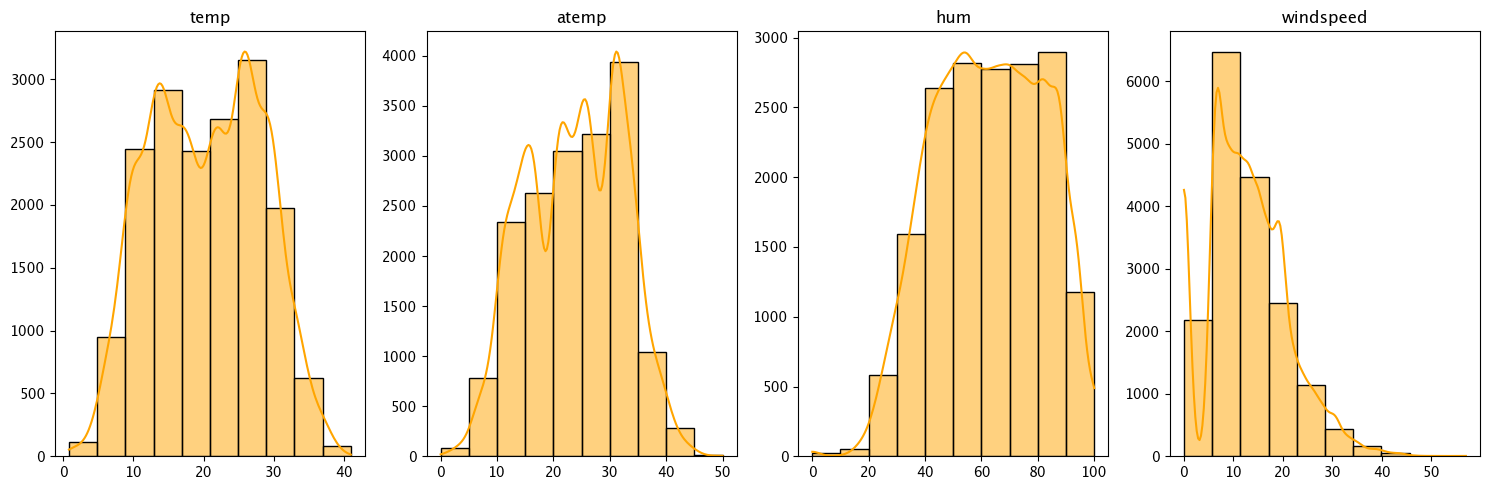

In [99]:
fig, axs = plt.subplots(1, 4, figsize=(15,5))

# lakukan iterasi pada variabel float dan buat histogram untuk masing-masing variabel
for i, ax in enumerate(axs):
    sns.histplot(x=hour_df_float[float_vars[i]], ax=ax, kde=True, bins=10, color='orange')
    
    # set the title and labels
    ax.set_title(float_vars[i])
    ax.set_xlabel("")
    ax.set_ylabel("")
    
# menyesuaikan tata letak subplot
plt.tight_layout()

plt.show()

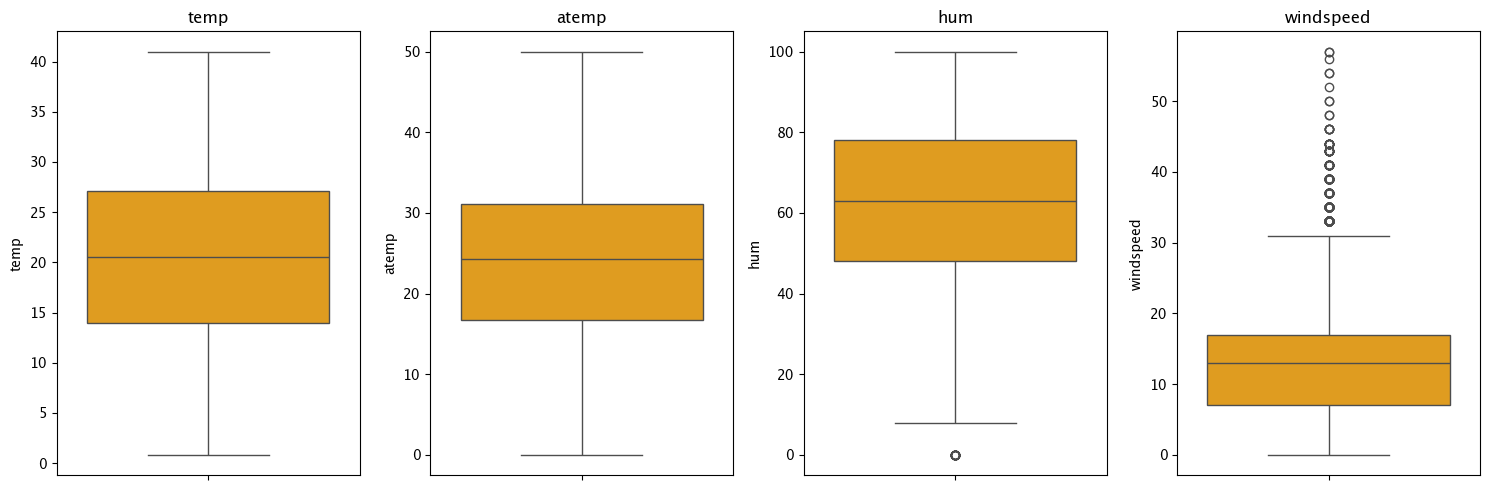

In [100]:
fig, axs = plt.subplots(1, 4, figsize=(15,5))

# Lakukan perulangan pada variabel float dan buat boxplot untuk masing-masing variabel
for i, ax in enumerate(axs):
    sns.boxplot(y=hour_df[float_vars[i]], orient='v', ax=ax, color='orange')

    # Set judul dan label
    ax.set_title(float_vars[i])
    ax.set_label("")

# Menyesuaikan tata letak subplot
plt.tight_layout()

# Menampilkan
plt.show()


### Histogram dan Boxplot pengguna sepeda bersama

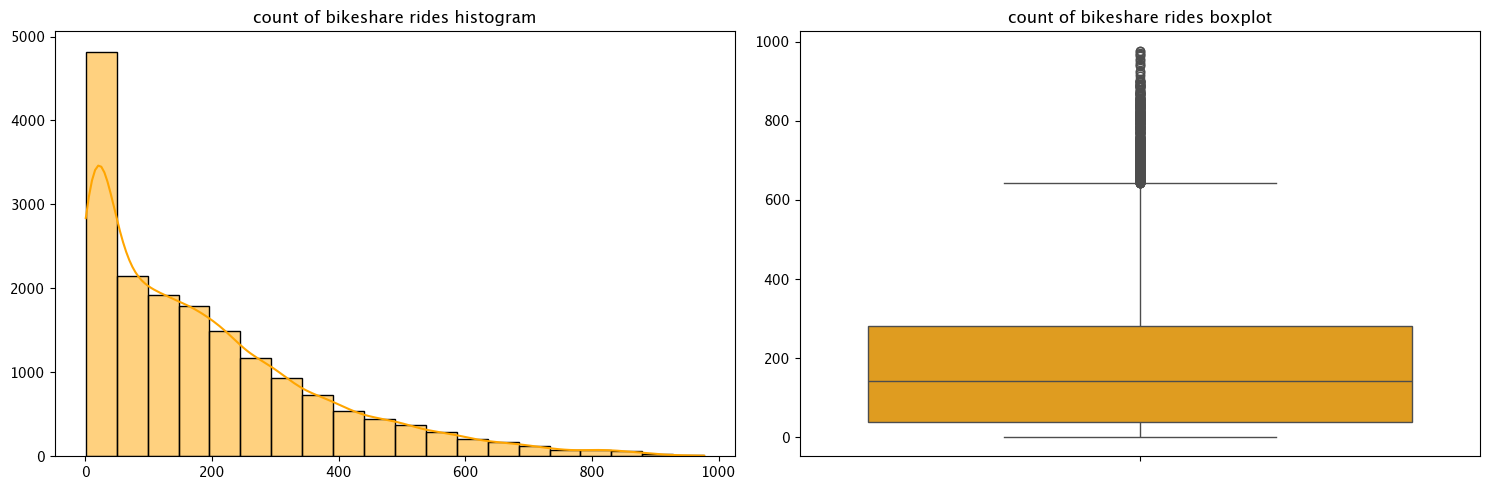

In [101]:
# Membuat gambar dan 2 subplot
fig, axs = plt.subplots(1, 2, figsize=(15, 5))


sns.histplot(hour_df['cnt'], kde=True, bins=20, ax = axs[0], color='orange')
axs[0].set_title("count of bikeshare rides histogram")
axs[0].set_xlabel("")
axs[0].set_ylabel("")

sns.boxplot(y=hour_df['cnt'], ax = axs[1], color='orange')
axs[1].set_title("count of bikeshare rides boxplot")
axs[1].set_xlabel("")
axs[1].set_ylabel("")


# Sesuaikan tata letak subplot
plt.tight_layout()

# Menampilkan
plt.show()

- Histogram untuk `temp`, `atemp`, dan `hum` menunjukkan distribusi normal, sedangkan untuk `kecepatan angin` miring ke kanan. Kita juga dapat menyimpulkan hal ini dengan mengamati nilai mean dan median pada setiap variabel.
- Boxplot untuk `temp`, `atemp`, dan `hum` tidak menunjukkan adanya pencilan, sedangkan untuk `kecepatan angin` terdapat pencilan.
- Histogram untuk jumlah perjalanan bikeshare miring ke kanan. Terdapat juga pencilan yang teramati pada boxplot.
- Meskipun terdapat pencilan pada variabel `kecepatan angin`, kami melihat bahwa nilai maksimumnya adalah 57 mph, dan ini bukan merupakan anomali dan dapat terjadi dalam kehidupan nyata. Jadi kita tidak akan menghapus pencilan dalam kasus ini.
- Sama seperti `windspeed`, pencilan tidak akan dihapus karena mungkin saja ada hari-hari dengan jumlah perjalanan yang sangat tinggi.

### 5.2 Multivariate Analysis

### Hitung jumlah pengguna biasa dan pengguna terdaftar

/var/folders/w7/psg6kg3x7lz0d1td7l629_ww0000gn/T/ipykernel_3167/2323220091.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Registered', 'Casual'], y=[registered_sum, casual_sum], palette=["orange", "wheat"])


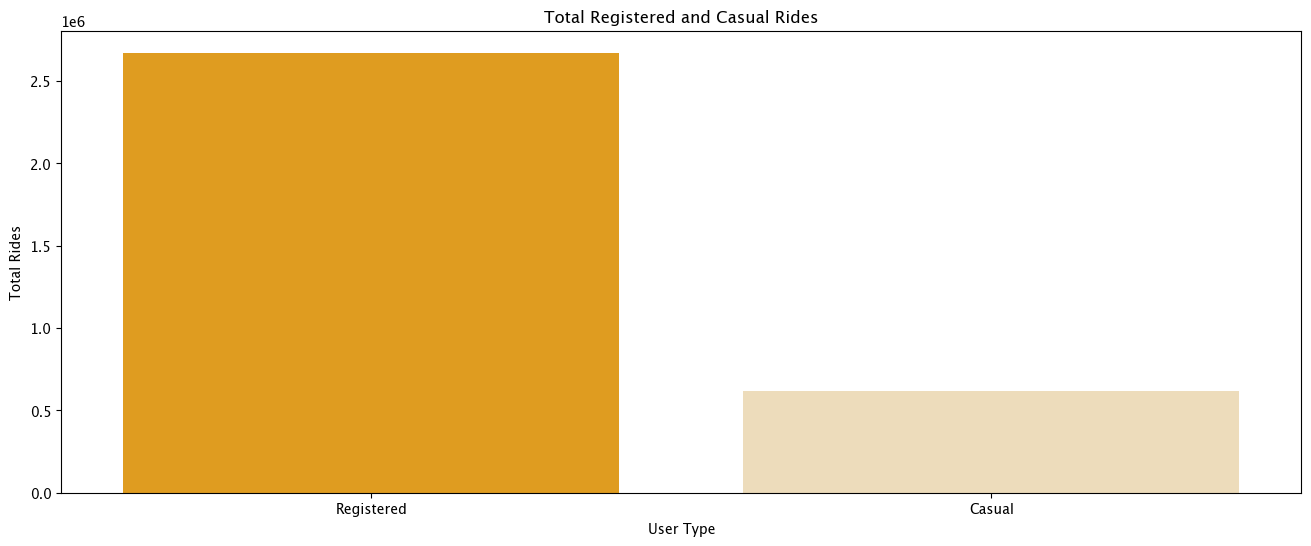

Count of registered users: 2672662
Count of casual users: 620017


In [102]:
registered_sum = hour_df['registered'].sum()
casual_sum = hour_df['casual'].sum()

plt.figure(figsize=(16,6))

sns.barplot(x=['Registered', 'Casual'], y=[registered_sum, casual_sum], palette=["orange", "wheat"])

plt.xlabel("User Type")
plt.ylabel("Total Rides")
plt.title("Total Registered and Casual Rides")

# Menampilakn
plt.show()

print(f"Count of registered users: {registered_sum}")
print(f"Count of casual users: {casual_sum}")

The number of registered bikeshare users are higher than higher than casual users

### Plot deret waktu pengguna bikeshare

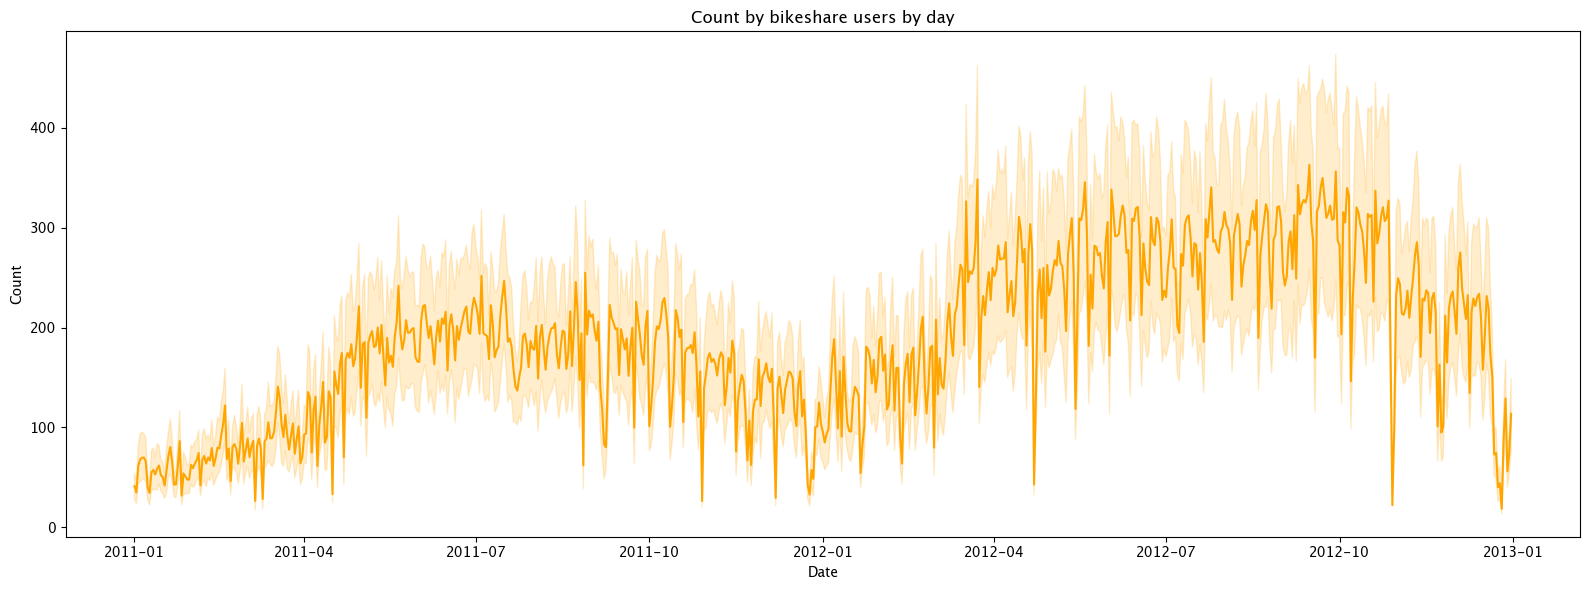

In [103]:
plt.figure(figsize=(16,6))

# Membuat plot garis menggunakan fungsi sns.lineplot()  
sns.lineplot(x="dteday", y="cnt", data=hour_df, color='orange')

# Menambahkan label dan judul ke plot
plt.xlabel("Date")
plt.ylabel("Count")
plt.title("Count by bikeshare users by day")

# Menampikan
plt.tight_layout()
plt.show()

- Jumlah perjalanan dimulai dengan jumlah yang rendah pada awal setiap tahun, kemudian mulai meningkat pada pertengahan tahun, lalu menurun mendekati akhir tahun.
- Jumlah pengguna tampaknya lebih tinggi pada tahun 2012 daripada tahun 2011.

### Plot kotak pengguna bikeshare berdasarkan jenisnya

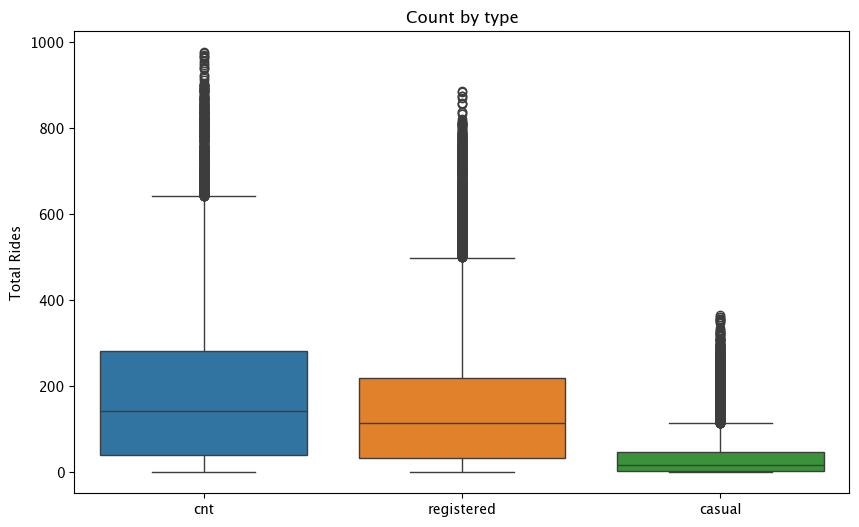

In [104]:
plt.figure(figsize=(10,6))

sns.boxplot(data=hour_df[['cnt', 'registered', 'casual']])

# Menambahkan label dan judul
plt.ylabel("Total Rides")
plt.title("Count by type")

plt.show()

Jumlah perjalanan bikeshare bervariasi berdasarkan keanggotaan; jumlah perjalanan bikeshare yang terdaftar lebih banyak daripada yang tidak terdaftar

### Boxplot dari pengguna bikeshare berdasarkan tahun

/var/folders/w7/psg6kg3x7lz0d1td7l629_ww0000gn/T/ipykernel_3167/2470244490.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


<Axes: xlabel='yr', ylabel='cnt'>

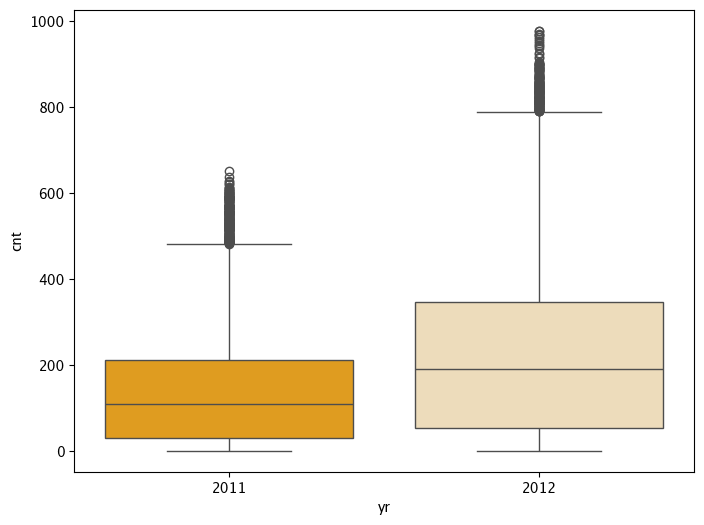

In [105]:
plt.figure(figsize=(8,6))

# Membuat sebuah bocplot dengan menggunakana sns.boxplot()
sns.boxplot(
    x="yr",
    y='cnt',
    data=hour_df,
    palette=["orange", 'wheat']
)

Seperti yang terlihat pada grafik garis sebelumnya, dan dikonfirmasi oleh boxplot ini, jumlah perjalanan bikeshare pada tahun 2012 lebih tinggi dibandingkan dengan tahun 2011.

### Boxplots berdasarkan pengguna per musim

/var/folders/w7/psg6kg3x7lz0d1td7l629_ww0000gn/T/ipykernel_3167/2777759738.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/var/folders/w7/psg6kg3x7lz0d1td7l629_ww0000gn/T/ipykernel_3167/2777759738.py:4: UserWarning: 
The palette list has fewer values (2) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(


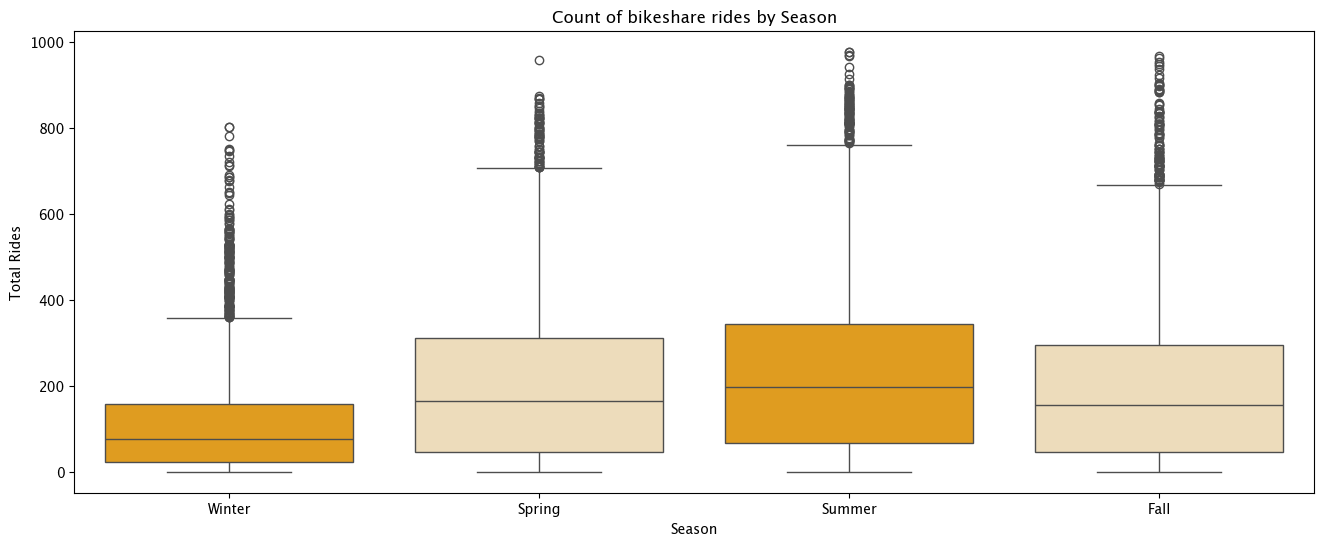

In [106]:
plt.figure(figsize=(16,6))

# Membuat boxplot menggunakan fungsi sns.boxplot()
sns.boxplot(
    x="season",
    y="cnt",
    data=hour_df,
    palette=["orange", "wheat"]
)

# Menambahkan label dan judul ke plot
plt.xlabel("Season")
plt.ylabel("Total Rides")
plt.title("Count of bikeshare rides by Season")

plt.show()

Jumlah perjalanan bikeshare paling sedikit di musim dingin, dan paling banyak di musim panas.

### Boxplots dari pengguna bikeshare per bulan

/var/folders/w7/psg6kg3x7lz0d1td7l629_ww0000gn/T/ipykernel_3167/785256549.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/var/folders/w7/psg6kg3x7lz0d1td7l629_ww0000gn/T/ipykernel_3167/785256549.py:4: UserWarning: 
The palette list has fewer values (2) than needed (12) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(


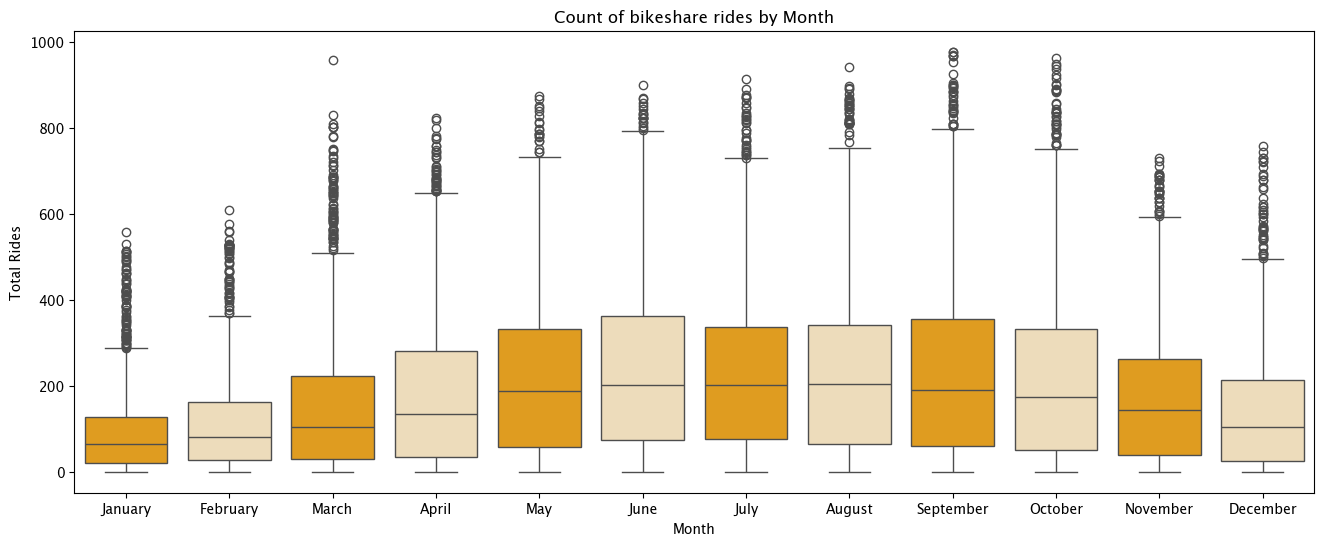

In [107]:
plt.figure(figsize=(16,6))

# Membuat boxplot menggunakan fungsi sns.boxplot()
sns.boxplot(
    x="mnth",
    y="cnt",
    data=hour_df,
    palette=["orange", "wheat"]
)

# Menambahkan label dan judul ke plot
plt.xlabel("Month")
plt.ylabel("Total Rides")
plt.title("Count of bikeshare rides by Month")

plt.show()

Seperti yang terlihat pada grafik garis sebelumnya, dan dikonfirmasi oleh boxplot ini, jumlah perjalanan bikeshare cenderung meningkat di pertengahan tahun, dan menurun di awal tahun (Januari dan Februari) dan di akhir tahun (November dan Desember)

### Boxplots  pengguna bikeshare berdasarkan hari kerja

/var/folders/w7/psg6kg3x7lz0d1td7l629_ww0000gn/T/ipykernel_3167/1875885568.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/var/folders/w7/psg6kg3x7lz0d1td7l629_ww0000gn/T/ipykernel_3167/1875885568.py:6: UserWarning: 
The palette list has fewer values (2) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(


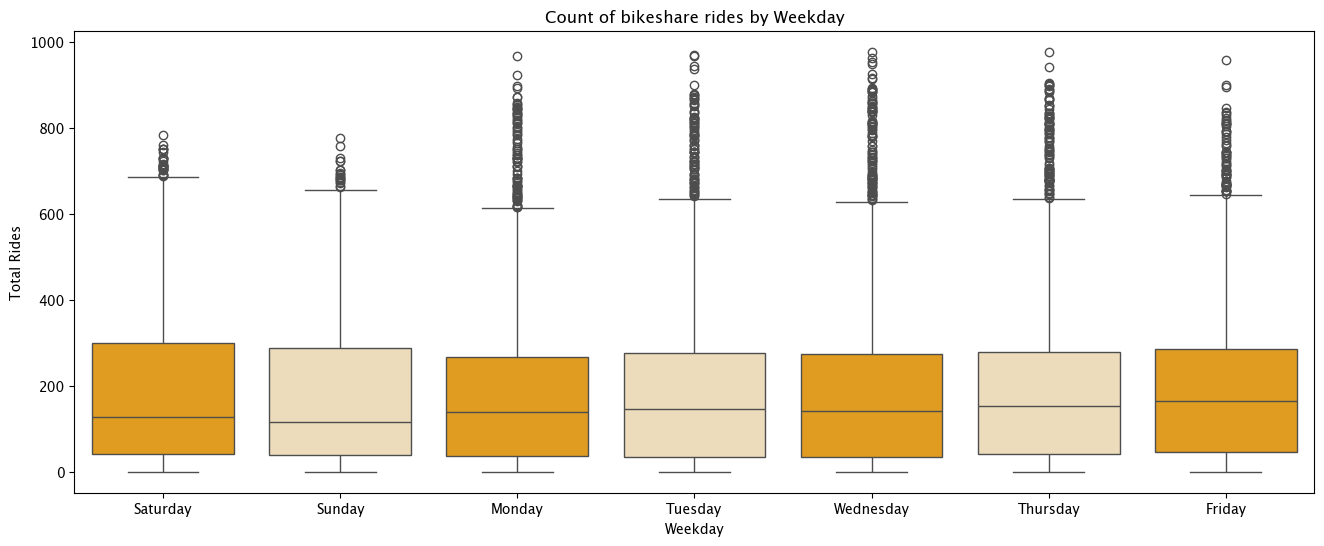

In [108]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(16,6))

# Membuat boxplot menggunakan fungsi sns.boxplot()
sns.boxplot(
    x="weekday",
    y="cnt",
    data=hour_df,
    palette=["orange", "wheat"]
)

# Menambahkan label dan judul ke plot
plt.xlabel("Weekday")
plt.ylabel("Total Rides")
plt.title("Count of bikeshare rides by Weekday")

plt.show()

### Boxplots  pengguna bikeshare berdasarkan jam

/var/folders/w7/psg6kg3x7lz0d1td7l629_ww0000gn/T/ipykernel_3167/1057058260.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/var/folders/w7/psg6kg3x7lz0d1td7l629_ww0000gn/T/ipykernel_3167/1057058260.py:4: UserWarning: 
The palette list has fewer values (2) than needed (24) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(


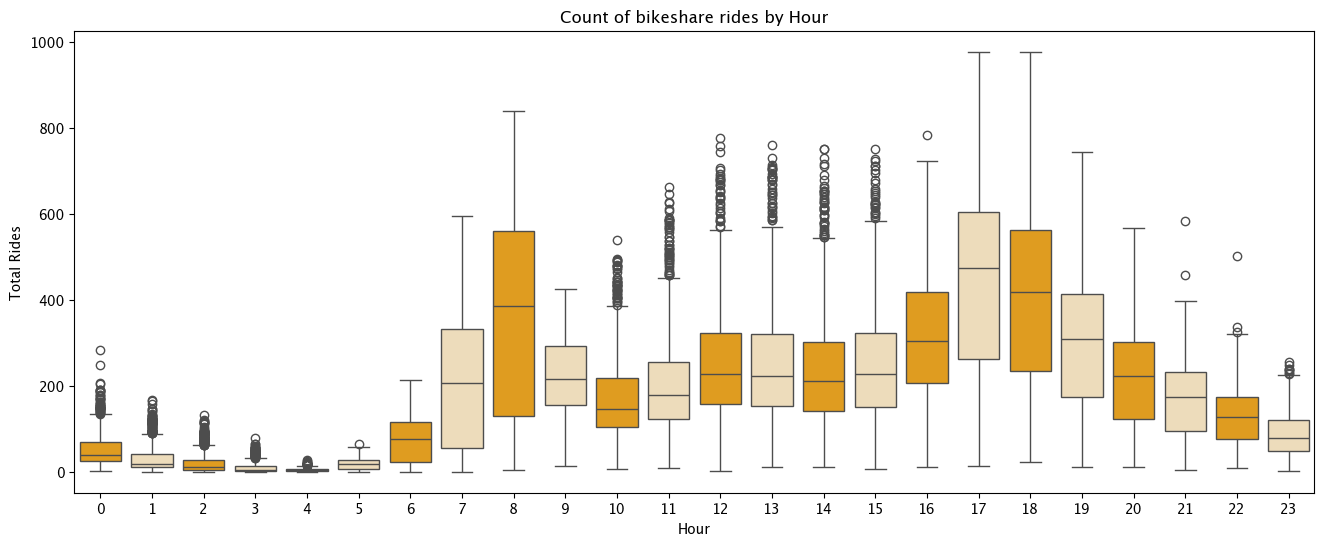

In [109]:
plt.figure(figsize=(16,6))

# Membuat boxplot menggunakan fungsi sns.boxplot()
sns.boxplot(
    x="hr",
    y="cnt",
    data=hour_df,
    palette=["orange", "wheat"]
)

# Menambahkan label dan judul ke plot
plt.xlabel("Hour")
plt.ylabel("Total Rides")
plt.title("Count of bikeshare rides by Hour")

plt.show()

- Dari tengah malam hingga subuh, jumlah perjalanan bikeshare adalah yang terendah
- Mulai meningkat di pagi hari, dan mencapai puncaknya pada pukul 8.00
- Mulai menurun lagi pada siang hari, tetapi mulai pukul 16.00 mulai meningkat lagi dan mencapai puncaknya pada pukul 17.00
- Setelah itu jumlah perjalanan bikeshare menurun sepanjang malam

### Boxplots pengguna bikeshare pada hari libur

/var/folders/w7/psg6kg3x7lz0d1td7l629_ww0000gn/T/ipykernel_3167/1239002677.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


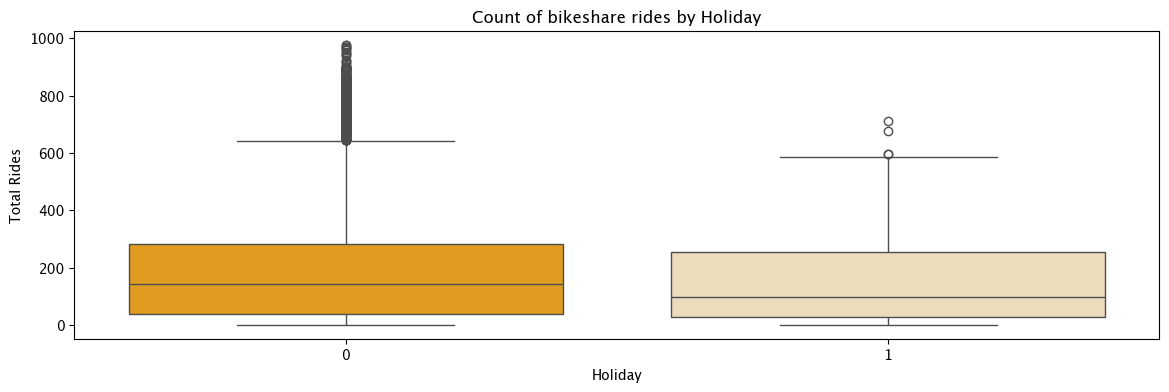

Count of bikeshare users based on holiday:
holiday
0    16879
1      500
Name: count, dtype: int64


In [110]:
plt.figure(figsize=(14,4))

# Membuat boxplot menggunakan fungsi sns.boxplot()
sns.boxplot(
    x="holiday",
    y="cnt",
    data=hour_df,
    palette=["orange", "wheat"]
)

# Menambahkan label dan judul ke plot
plt.xlabel("Holiday")
plt.ylabel("Total Rides")
plt.title("Count of bikeshare rides by Holiday")

plt.show()

print('Count of bikeshare users based on holiday:')
print(hour_df['holiday'].value_counts())

Jumlah perjalanan bikeshare pada hari biasa lebih tinggi daripada hari libur, meskipun dapat dimaklumi karena hari libur lebih sedikit daripada hari biasa.

### Boxplots dari pengguna bikeshare di hari kerja

/var/folders/w7/psg6kg3x7lz0d1td7l629_ww0000gn/T/ipykernel_3167/195657514.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


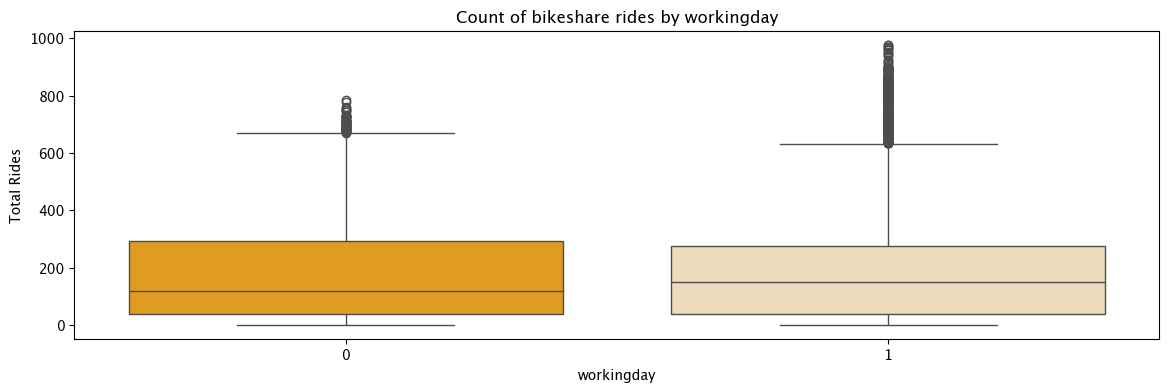

Count of bikeshare users based on workingday:
workingday
1    11865
0     5514
Name: count, dtype: int64


In [111]:
plt.figure(figsize=(14,4))

# Membuat boxplot menggunakan fungsi sns.boxplot()
sns.boxplot(
    x="workingday",
    y="cnt",
    data=hour_df,
    palette=["orange", "wheat"]
)

# Menambahkan label dan judul ke plot
plt.xlabel("workingday")
plt.ylabel("Total Rides")
plt.title("Count of bikeshare rides by workingday")

plt.show()

print('Count of bikeshare users based on workingday:')
print(hour_df['workingday'].value_counts())

Jumlah perjalanan bikeshare pada hari kerja lebih tinggi daripada hari libur, meskipun dapat dimaklumi karena hari libur dan akhir pekan lebih sedikit dibandingkan dengan hari kerja

### Scatterplot suhu, suhu udara, kelembapan, dan kecepatan angin vs. jumlah pengguna bikeshare

In [112]:
# extract variabel scatterplot
scatter_vars = ['cnt', 'temp', 'atemp', 'hum', 'windspeed']
df_scatter = hour_df[scatter_vars]

df_scatter.head(3)

,cnt,temp,atemp,hum,windspeed
0,16,9.84,14.395,81.0,0.0
1,40,9.02,13.635,80.0,0.0
2,32,9.02,13.635,80.0,0.0


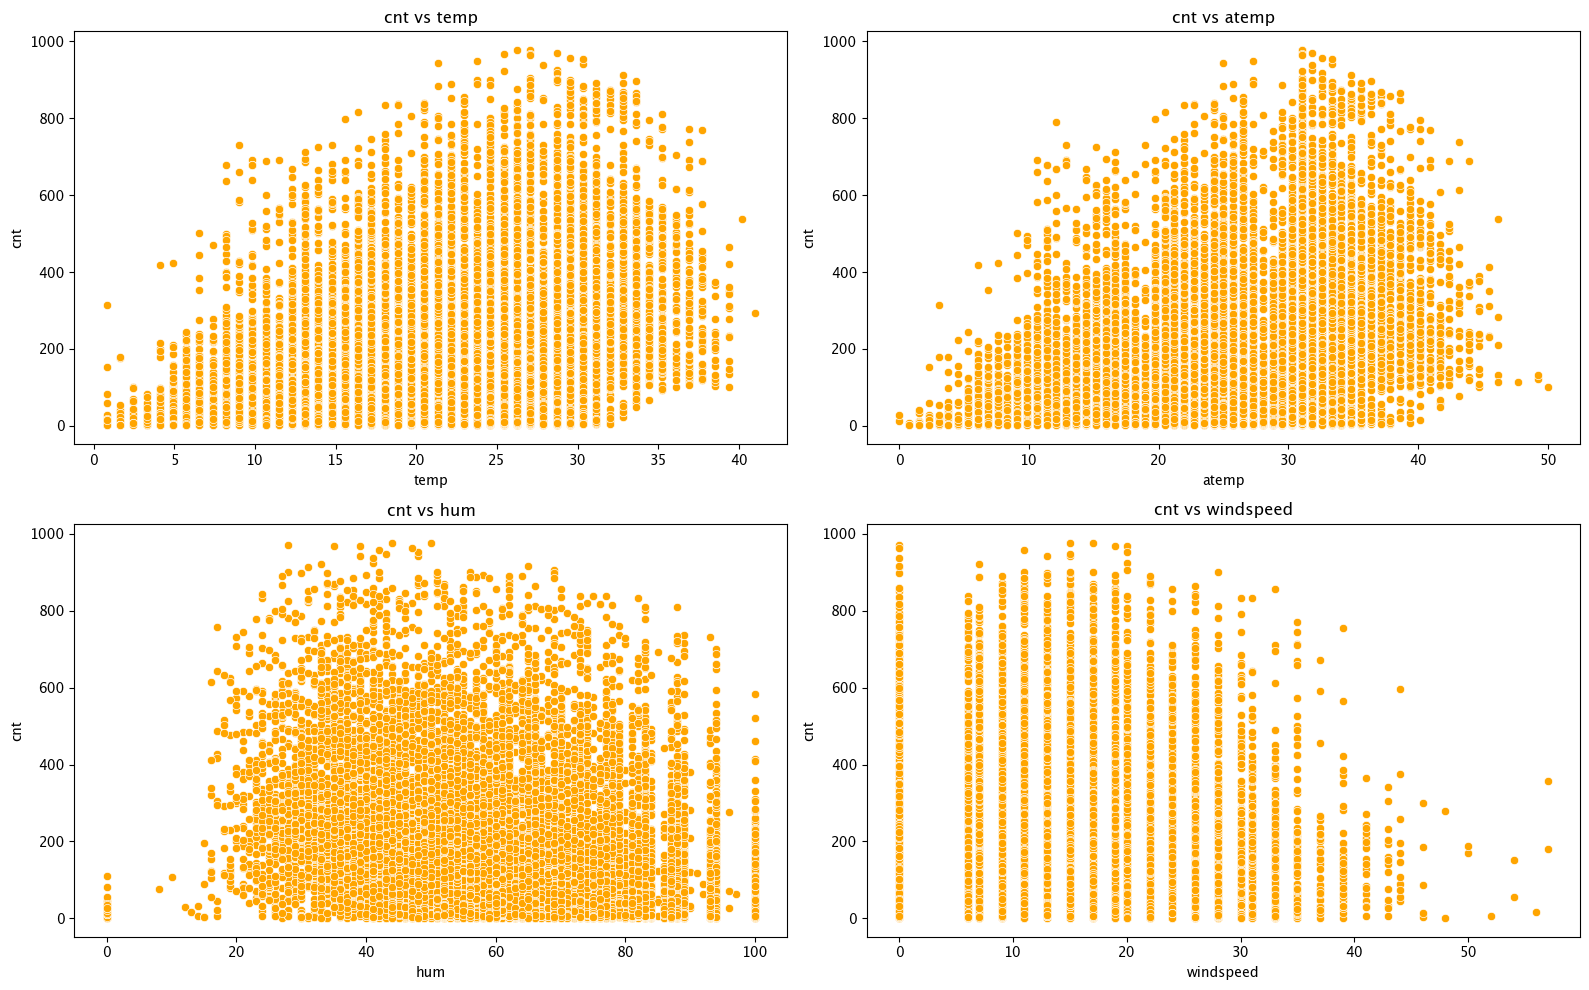

In [113]:
# membuat figure dengan 2x2 subplots
fig, axs = plt.subplots(2, 2, figsize=(16, 10))

# Lakukan iterasi pada variabel lainnya dan buat scatterplot untuk masing-masing variabel
for i, col in enumerate(hour_df.columns[10:14]):
    sns.scatterplot(x=col, y='cnt', data=hour_df, ax=axs[i // 2, i % 2], color='orange')
    axs[i // 2, i % 2].set_title(f'cnt vs {col}')

# Sesuaikan tata letak subplot
plt.tight_layout()

plt.show()

- Plot sebaran cnt vs temp dan cnt vs atemp menunjukkan bahwa jumlah perjalanan bikeshare meningkat seiring dengan peningkatan suhu. Sepertinya ada korelasi antara suhu dan jumlah perjalanan bikeshare.
- Plot sebaran hum vs cnt tidak menunjukkan adanya korelasi.
- Scatter plot cnt vs kecepatan angin menunjukkan bahwa jumlah perjalanan bikeshare terlihat menurun seiring dengan meningkatnya kecepatan angin.

### Correlation and Correlation Heat Map

In [115]:
hour_df.corr(numeric_only=True)

,instant,yr,hr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.866014,-0.004775,0.014723,-0.003416,-0.014198,0.136178,0.137615,0.009577,-0.074505,0.158295,0.282046,0.278379
yr,0.866014,1.000000,-0.003867,0.006692,-0.002196,-0.019157,0.040913,0.039222,-0.083546,-0.008740,0.142779,0.253684,0.250495
hr,-0.004775,-0.003867,1.000000,0.000479,0.002285,-0.020203,0.137603,0.133750,-0.276498,0.137252,0.301202,0.374141,0.394071
holiday,0.014723,0.006692,0.000479,1.000000,-0.252471,-0.017036,-0.027340,-0.030973,-0.010588,0.003988,0.031564,-0.047345,-0.030927
workingday,-0.003416,-0.002196,0.002285,-0.252471,1.000000,0.044672,0.055390,0.054667,0.015688,-0.011830,-0.300942,0.134326,0.030284
weathersit,-0.014198,-0.019157,-0.020203,-0.017036,0.044672,1.000000,-0.102640,-0.105563,0.418130,0.026226,-0.152628,-0.120966,-0.142426
temp,0.136178,0.040913,0.137603,-0.027340,0.055390,-0.102640,1.000000,0.987672,-0.069881,-0.023125,0.459616,0.335361,0.404772
atemp,0.137615,0.039222,0.133750,-0.030973,0.054667,-0.105563,0.987672,1.000000,-0.051918,-0.062336,0.454080,0.332559,0.400929
hum,0.009577,-0.083546,-0.276498,-0.010588,0.015688,0.418130,-0.069881,-0.051918,1.000000,-0.290105,-0.347028,-0.273933,-0.322911
windspeed,-0.074505,-0.008740,0.137252,0.003988,-0.011830,0.026226,-0.023125,-0.062336,-0.290105,1.000000,0.090287,0.082321,0.093234


<Axes: >

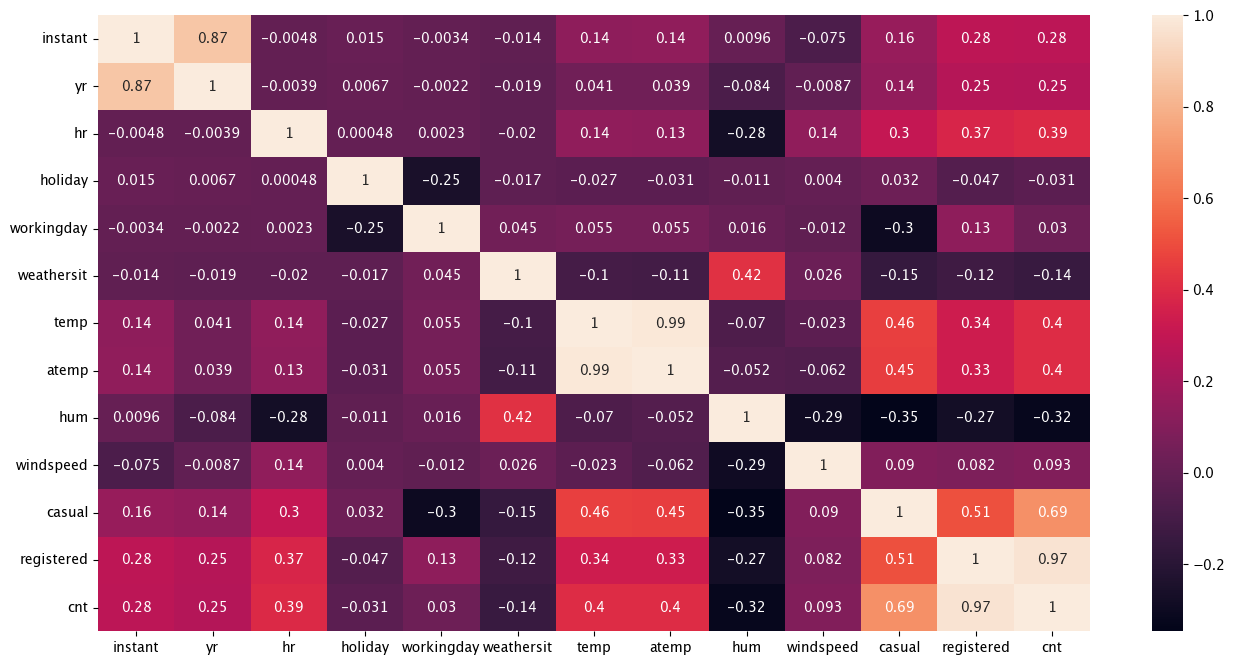

In [117]:
plt.figure(figsize=(16,8))
sns.heatmap(hour_df.corr(numeric_only=True), annot=True)

- Terdapat korelasi yang kuat antara variabel pengguna biasa dan terdaftar vs cnt, meskipun hal ini sudah diperkirakan sebelumnya karena peningkatan pengguna biasa dan terdaftar akan mempengaruhi cnt (jumlah perjalanan) secara langsung.
- Terdapat korelasi yang sedang antara hr, temp, dan atemp vs jumlah perjalanan bikeshare.

## 6. Visualization and Explanatory Data Analysis
---

- Terdapat korelasi yang kuat antara variabel pengguna biasa dan terdaftar vs cnt, meskipun hal ini sudah diperkirakan sebelumnya karena peningkatan pengguna biasa dan terdaftar akan mempengaruhi cnt (jumlah perjalanan) secara langsung.
- Terdapat korelasi yang sedang antara hr, temp, dan atemp vs jumlah perjalanan bikeshare.

### 6.1 Bagaimana tren jumlah perjalanan berbagi sepeda dalam beberapa tahun terakhir?

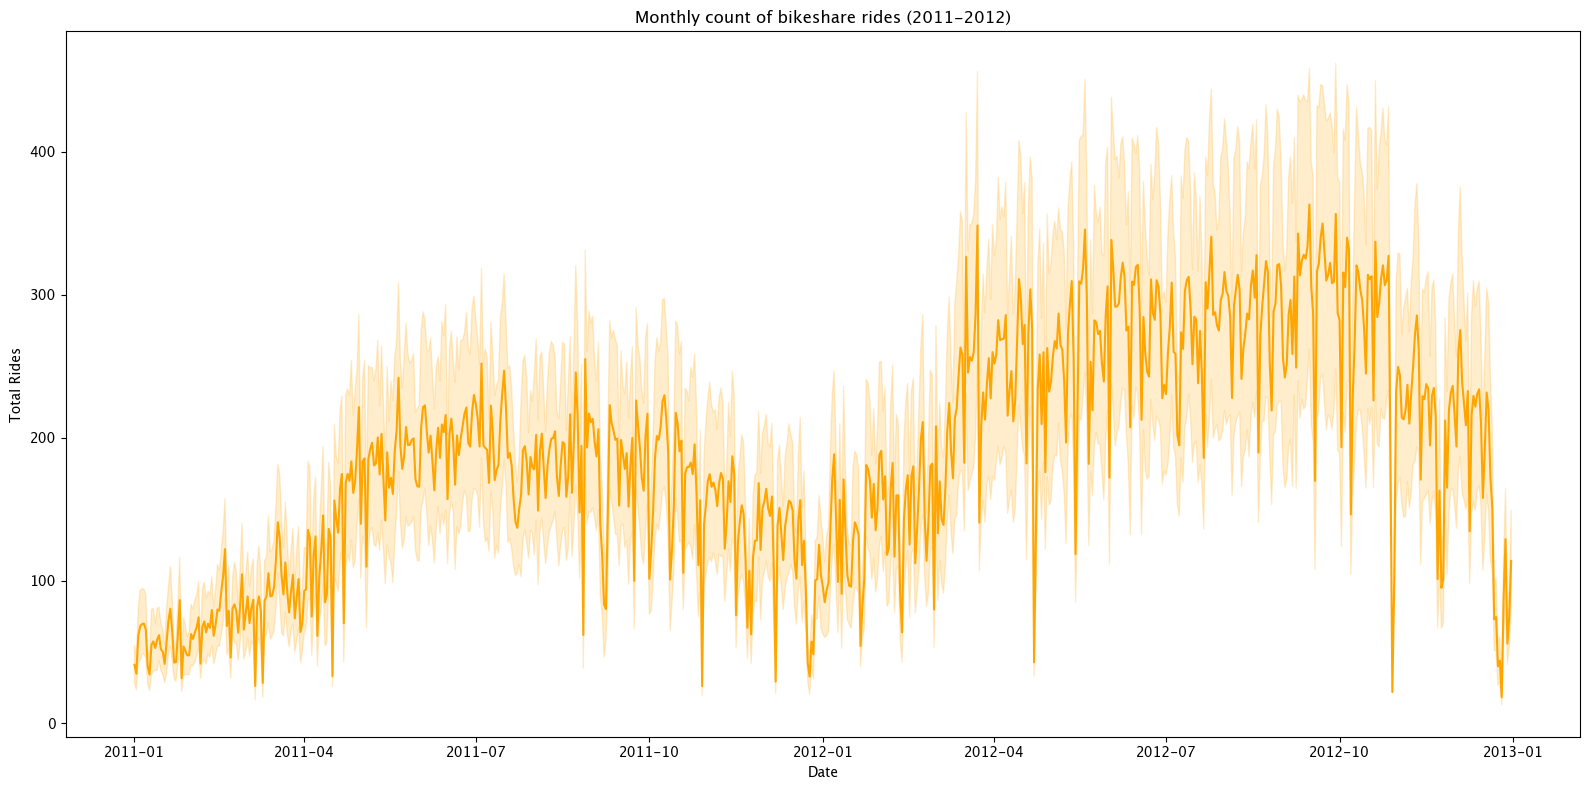

In [118]:
plt.figure(figsize=(16,8))

# Membuat plot garis menggunakan sns.lineplot()
sns.lineplot(x='dteday', y='cnt', data=hour_df, color='orange')

# Menambahkan label dan judul plot
plt.xlabel('Date')
plt.ylabel("Total Rides")
plt.title("Monthly count of bikeshare rides (2011-2012)")

plt.tight_layout()
plt.show()

To make it more interpretable, let's pivot it to monthly figure. Using `resample`, we will aggregate the time-series based data (from daily to monthly)

In [119]:
monthly_users_df = hour_df.resample(rule='M', on='dteday').agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})

monthly_users_df.head(3)

,casual,registered,cnt
dteday,,,
2011-01-31,3073,35116,38189
2011-02-28,6242,41973,48215
2011-03-31,12826,51219,64045


In [121]:
monthly_users_df.index = monthly_users_df.index.strftime('%b-%y')
monthly_users_df.head(3)

,casual,registered,cnt
dteday,,,
Jan-11,3073,35116,38189
Feb-11,6242,41973,48215
Mar-11,12826,51219,64045


In [122]:
monthly_users_df = monthly_users_df.reset_index()
monthly_users_df = monthly_users_df.rename(columns={'dteday': 'yearmonth'})
monthly_users_df.head()

,yearmonth,casual,registered,cnt
0,Jan-11,3073,35116,38189
1,Feb-11,6242,41973,48215
2,Mar-11,12826,51219,64045
3,Apr-11,22346,72524,94870
4,May-11,31050,104771,135821


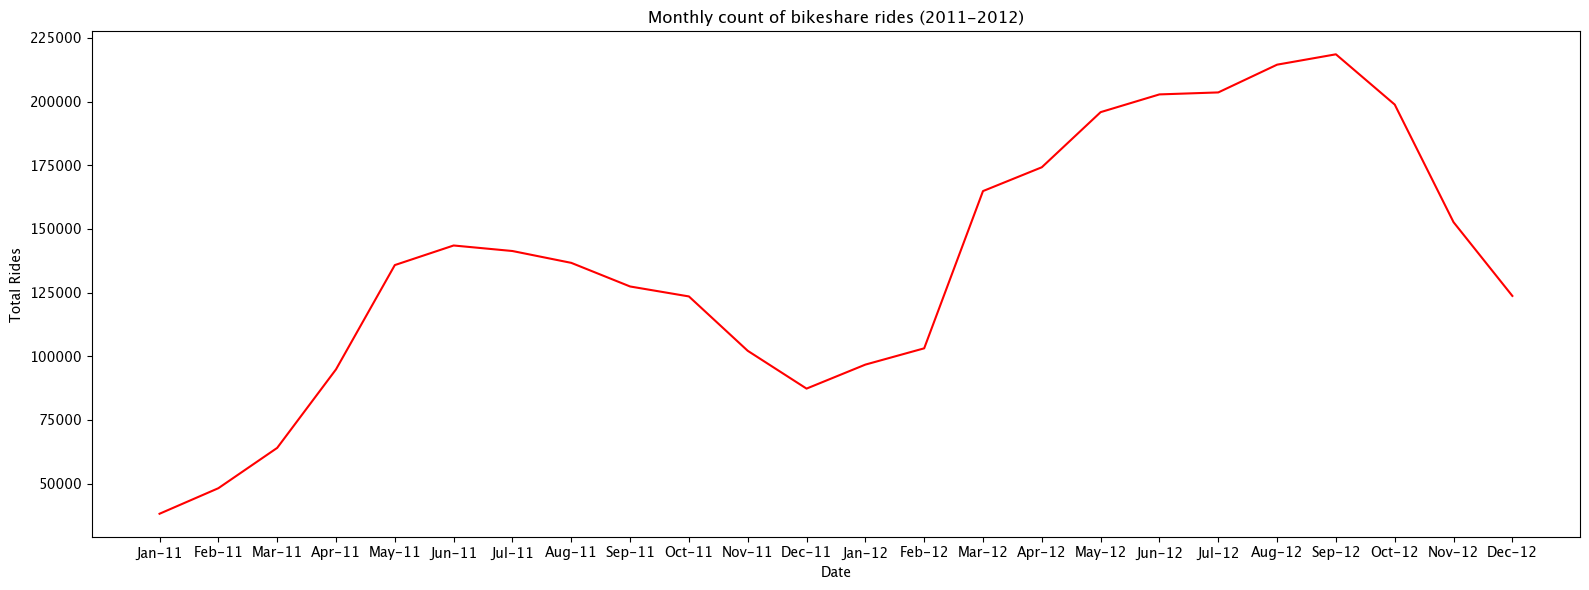

In [123]:
plt.figure(figsize=(16,6))

# Membuat plot garis menggunakan fungsi sns.lineplot()
sns.lineplot(x="yearmonth", y="cnt", data=monthly_users_df, color='red')

# Menambahkan judul dan label
plt.xlabel("Date")
plt.ylabel("Total Rides")
plt.title("Monthly count of bikeshare rides (2011-2012)")

plt.tight_layout()
plt.show()

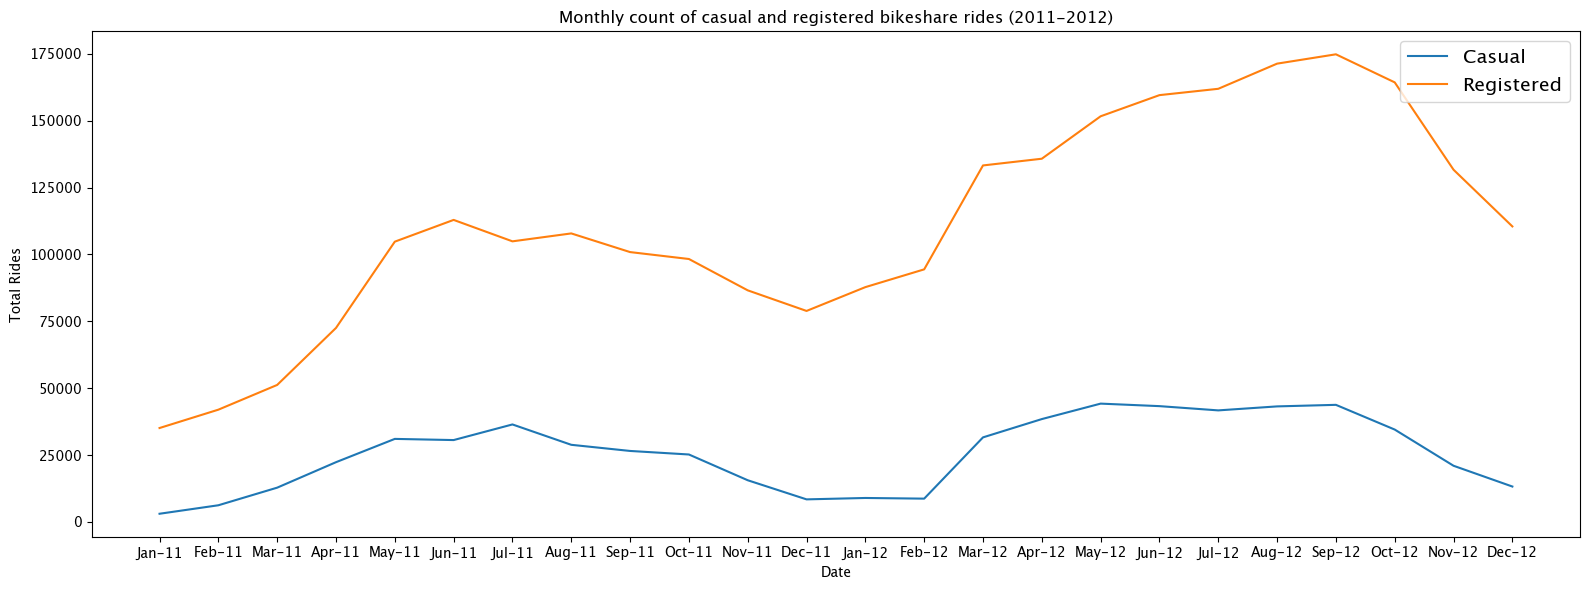

In [124]:
plt.figure(figsize=(16,6))


sns.lineplot(x="yearmonth", y="casual", data=monthly_users_df, label='Casual')
sns.lineplot(x="yearmonth", y="registered", data=monthly_users_df, label='Registered')

plt.xlabel("Date")
plt.ylabel("Total Rides")
plt.title("Monthly count of casual and registered bikeshare rides (2011-2012)")

# Menambahkan legend
plt.legend(loc='upper right', fontsize=14)

plt.tight_layout()
plt.show()

**Insight**
1. Jumlah perjalanan bikeshare pada tahun 2012 lebih tinggi daripada tahun 2011.
2. Kita dapat melihat adanya musim dalam 2 tahun tersebut. Jumlah perjalanan bikeshare biasanya dimulai dengan jumlah yang rendah pada awal tahun, kemudian mulai meningkat pada kuartal kedua, lalu mulai menurun pada kuartal keempat.
3. Jumlah perjalanan bikeshare yang terdaftar lebih tinggi daripada perjalanan biasa, meskipun keduanya menunjukkan tren yang sama sepanjang tahun.

### 6.2 Bagaimana pola penggunaan layanan bike-sharing berdasarkan waktu?

In [126]:
hourly_users_df = hour_df.groupby("hr").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})

hourly_users_df.head()

,casual,registered,cnt
hr,,,
0,7375,31755,39130
1,4709,19455,24164
2,3412,12940,16352
3,1893,6281,8174
4,874,3554,4428


In [127]:
hourly_users_df = hourly_users_df.reset_index()
hourly_users_df.head()

,hr,casual,registered,cnt
0,0,7375,31755,39130
1,1,4709,19455,24164
2,2,3412,12940,16352
3,3,1893,6281,8174
4,4,874,3554,4428


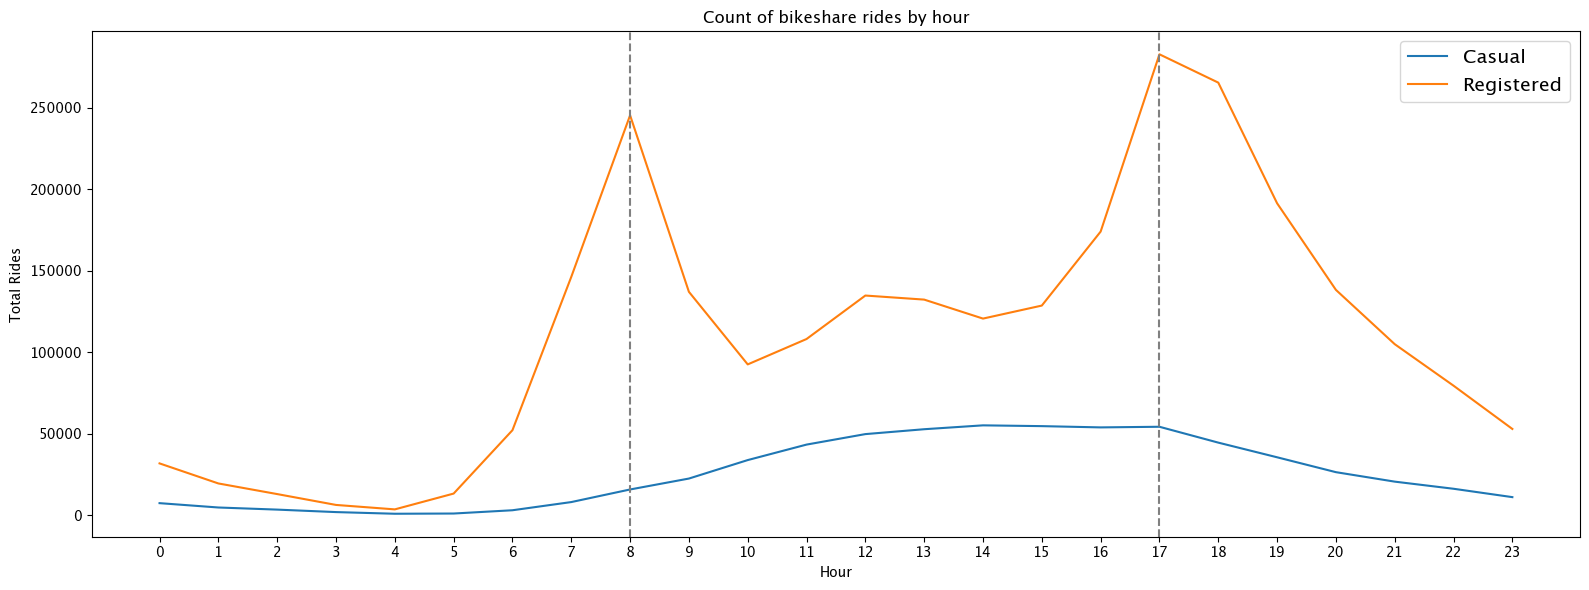

In [128]:
plt.figure(figsize=(16,6))


sns.lineplot(x="hr", y="casual", data=hourly_users_df, label='Casual')
sns.lineplot(x="hr", y="registered", data=hourly_users_df, label='Registered')

x = np.arange(0, 24, 1)
plt.xticks(x)

plt.xlabel("Hour")
plt.ylabel("Total Rides")
plt.title("Count of bikeshare rides by hour")

# Highlight data yang penting 
plt.axvline(x=8, color='gray', linestyle='--')
plt.axvline(x=17, color='gray', linestyle='--')

plt.legend(loc='upper right', fontsize=14)

plt.tight_layout()
plt.show()

**Insight**
1. Grafik di atas menunjukkan pola yang sangat jelas tentang perbedaan yang sangat nyata antara pengguna bikeshare biasa dan terdaftar berdasarkan jam dalam sehari.
2. Perjalanan bikeshare terdaftar menunjukkan puncaknya pada pukul 8.00 dan 17.00. Mengingat kedua jam tersebut merupakan waktu dimana orang pergi dan pulang kerja, ada kemungkinan bahwa pengguna bikeshare terdaftar menggunakan sepeda untuk pergi ke kantor.
3. Di sisi lain, pengguna bikeshare kasual menunjukkan frekuensi yang lebih tinggi pada siang hari, kemudian mulai menurun setelah pukul 17.00.

### 6.3 Pada musim apa yang paling banyak digunakan untuk berbagi sepeda?

In [129]:
seasonly_users_df = hour_df.groupby("season").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})

seasonly_users_df.head()

,casual,registered,cnt
season,,,
Fall,129782,711831,841613
Spring,203522,715067,918589
Summer,226091,835038,1061129
Winter,60622,410726,471348


In [130]:
seasonly_users_df = seasonly_users_df.reset_index()
seasonly_users_df

,season,casual,registered,cnt
0,Fall,129782,711831,841613
1,Spring,203522,715067,918589
2,Summer,226091,835038,1061129
3,Winter,60622,410726,471348


In [136]:
season_order = ['Spring', 'Summer', 'Fall', 'Winter']

/var/folders/w7/psg6kg3x7lz0d1td7l629_ww0000gn/T/ipykernel_3167/717823881.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='season', y='cnt', data=seasonly_users_df, order=season_order, palette="muted")


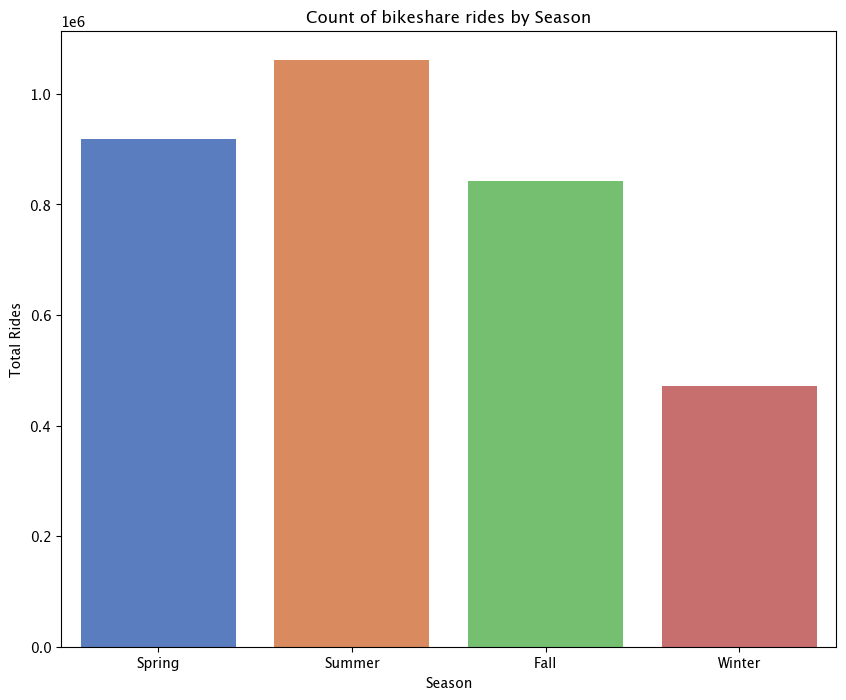

In [141]:

plt.figure(figsize=(10,8))

sns.barplot(x='season', y='cnt', data=seasonly_users_df, order=season_order, palette="muted")

plt.xlabel("Season")
plt.ylabel("Total Rides")
plt.title("Count of bikeshare rides by Season")

plt.show()


- Jumlah pengguna bikeshare paling tinggi pada musim panas, dan paling rendah pada musim dingin.
- Selanjutnya, untuk melihat perbedaan antara pola pengguna bikeshare biasa dan terdaftar di setiap musim, kami akan melakukan unpivot pada `season_users_df`

In [143]:
seasonly_users_df_unpivoted = pd.melt(seasonly_users_df,
                                      id_vars=['season'],
                                      value_vars=['casual', 'registered'],
                                      var_name='status',
                                      value_name='count')

seasonly_users_df_unpivoted

,season,status,count
0,Fall,casual,129782
1,Spring,casual,203522
2,Summer,casual,226091
3,Winter,casual,60622
4,Fall,registered,711831
5,Spring,registered,715067
6,Summer,registered,835038
7,Winter,registered,410726


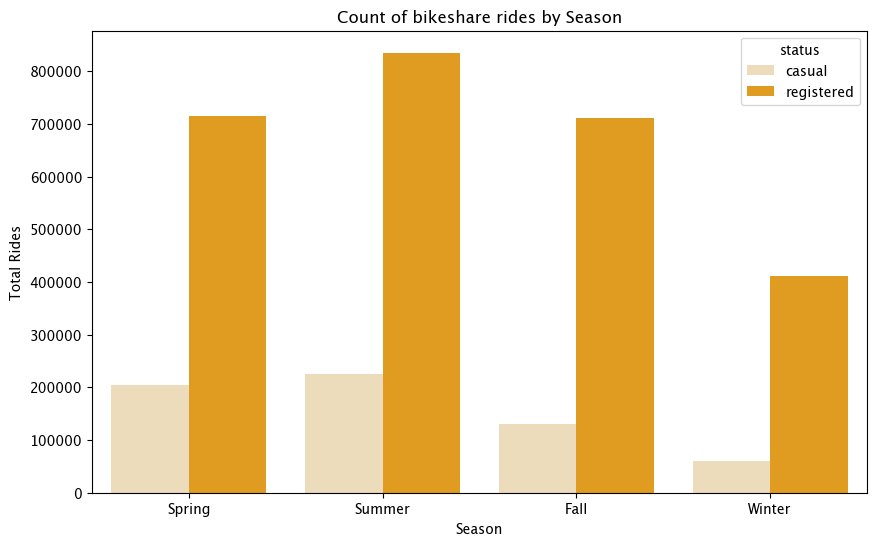

In [146]:
plt.figure(figsize=(10,6))

sns.barplot(x='season', y='count', data=seasonly_users_df_unpivoted, order=season_order, hue='status', palette=["wheat", "orange"])

plt.xlabel("Season")
plt.ylabel("Total Rides")
plt.title("Count of bikeshare rides by Season")

plt.show()

**Insight**
- Jumlah perjalanan bikeshare tertinggi selama musim panas, dan terendah selama musim dingin.
- Tidak ada perbedaan besar antara pola perjalanan kasual dan terdaftar pada setiap musim, keduanya tertinggi pada musim panas dan terendah pada musim dingin.

### 6.4 Bagaimana pola penggunaan layanan bikesharing berdasarkan hari dalam seminggu?

In [147]:
weekday_users_df = hour_df.groupby("weekday").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})

weekday_users_df

,casual,registered,cnt
weekday,,,
Friday,78238,409552,487790
Monday,70784,384719,455503
Saturday,153852,323955,477807
Sunday,140521,303506,444027
Thursday,61460,423935,485395
Tuesday,57843,411266,469109
Wednesday,57319,415729,473048


In [149]:
weekday_users_df = weekday_users_df.reset_index()
weekday_users_df

,index,weekday,casual,registered,cnt
0,0,Friday,78238,409552,487790
1,1,Monday,70784,384719,455503
2,2,Saturday,153852,323955,477807
3,3,Sunday,140521,303506,444027
4,4,Thursday,61460,423935,485395
5,5,Tuesday,57843,411266,469109
6,6,Wednesday,57319,415729,473048


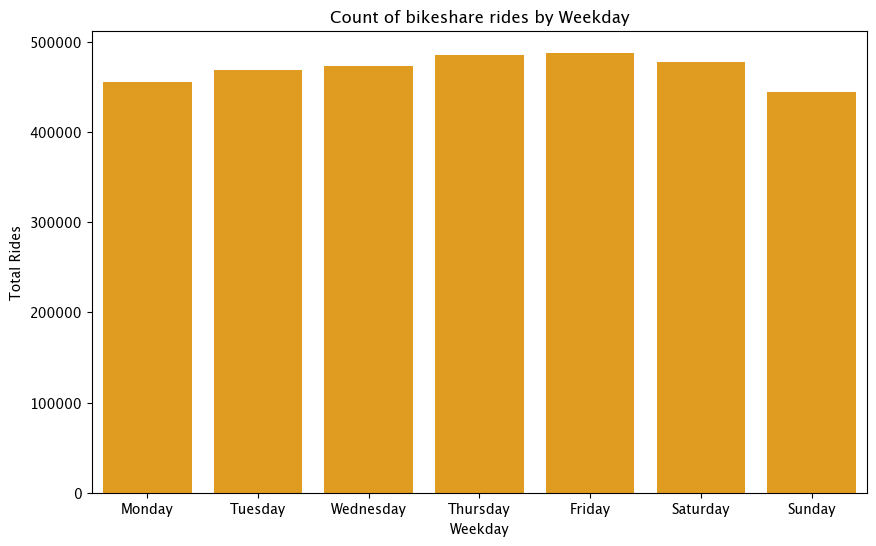

In [150]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(10,6))

sns.barplot(x='weekday', y='cnt', data=weekday_users_df, order=day_order, color='orange')

plt.xlabel("Weekday")
plt.ylabel("Total Rides")
plt.title("Count of bikeshare rides by Weekday")

plt.show()

- Sepertinya jumlah pengguna bikeshare tersebar cukup merata selama hari kerja
- Selanjutnya, untuk melihat perbedaan antara pola pengguna bikeshare biasa dan terdaftar pada hari kerja, kami akan menguraikan `weekday_users_df`

In [151]:
weekday_users_df_unpivoted = pd.melt(weekday_users_df,
                                      id_vars=['weekday'],
                                      value_vars=['casual', 'registered'],
                                      var_name='status',
                                      value_name='count')

weekday_users_df_unpivoted

,weekday,status,count
0,Friday,casual,78238
1,Monday,casual,70784
2,Saturday,casual,153852
3,Sunday,casual,140521
4,Thursday,casual,61460
5,Tuesday,casual,57843
6,Wednesday,casual,57319
7,Friday,registered,409552
8,Monday,registered,384719
9,Saturday,registered,323955


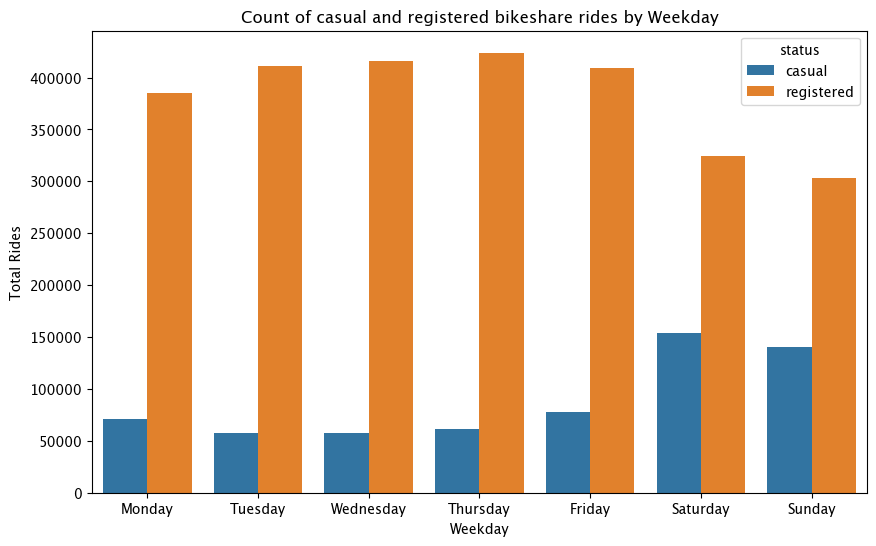

In [152]:
plt.figure(figsize=(10,6))

sns.barplot(x='weekday', y='count', data=weekday_users_df_unpivoted, order=day_order, hue='status')

plt.xlabel("Weekday")
plt.ylabel("Total Rides")
plt.title("Count of casual and registered bikeshare rides by Weekday")

plt.show()

**Insight**
1. Ketika kami memisahkan jumlah perjalanan bikeshare antara pengguna biasa dan pengguna terdaftar, kami melihat pola yang menarik di sini.
2. Jumlah pengguna biasa lebih tinggi pada akhir pekan, sementara untuk pengguna terdaftar lebih tinggi pada hari kerja.
3. Menambah wawasan yang kami temukan pada perjalanan per jam, hal ini semakin mendukung bahwa pengguna terdaftar mungkin menggunakan sepeda untuk bekerja secara rutin pada hari kerja, sementara pengguna kasual menggunakan sepeda untuk bersantai di akhir pekan.

### 6.5 Apakah ada korelasi antara suhu yang mengindikasikan kondisi saat perjalanan berbagi sepeda tinggi?

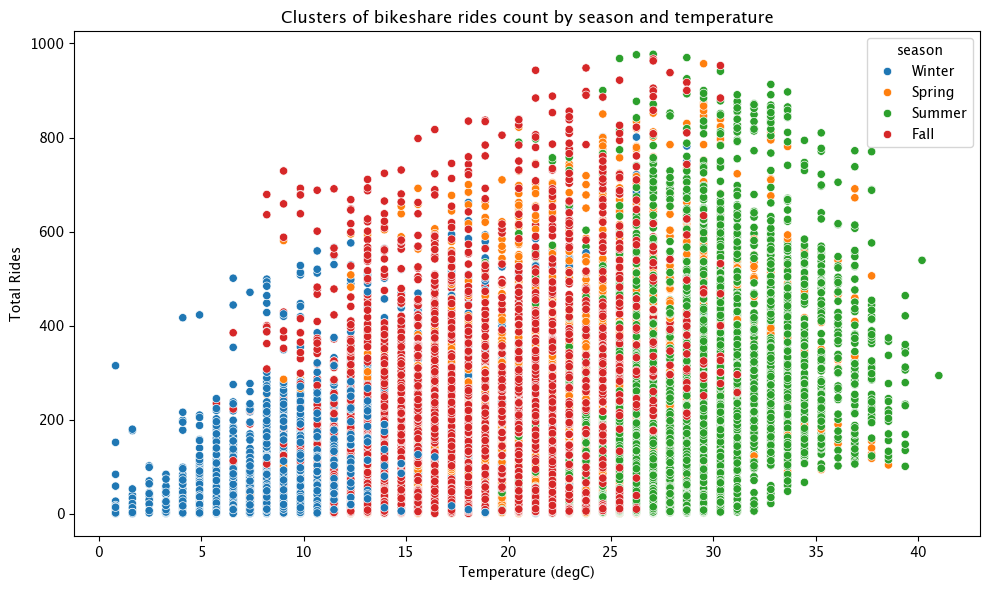

In [153]:
plt.figure(figsize=(10,6))

sns.scatterplot(x='temp', y='cnt', data=hour_df, hue='season')

plt.xlabel("Temperature (degC)")
plt.ylabel("Total Rides")
plt.title("Clusters of bikeshare rides count by season and temperature")

# Show the plot
plt.tight_layout()
plt.show()

**Insight**
1. Pada grafik di atas, pada saat suhu udara lebih rendah, jumlah perjalanan bikeshare juga rendah. Hal ini terjadi selama musim dingin.
2. Ketika suhu tinggi, jumlah perjalanan bikeshare juga meningkat. Hal ini terjadi pada musim panas.
3. Namun, tampaknya ada "sweet-spot" suhu di mana jumlah perjalanan bikeshare paling tinggi. Kita bisa melihatnya pada kelompok musim gugur dan musim panas. "Titik manis" suhu antara 20 derajat Celcius hingga 30 derajat Celcius.
4. Pada hari-hari dengan kondisi suhu tersebut, kita dapat mengharapkan jumlah perjalanan bikeshare akan tinggi.

### 6.6 Apakah cuaca mempengaruhi penggunaan bikeshare?

Mari kita mengingat kembali situasi cuaca dalam variabel `weathersit`:

- 1: Cerah, Sedikit awan, Sebagian berawan, Sebagian berawan
- 2: Kabut + Mendung, Kabut + Awan pecah, Kabut + Sedikit awan, Kabut
- 3: Salju Ringan, Hujan Ringan + Badai Petir + Awan berserakan, Hujan Ringan + Awan berserakan
- 4: Hujan Lebat + Hujan Es + Badai Petir + Kabut, Salju + Kabut

In [154]:
weatherly_users_df = hour_df.groupby('weathersit').agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})

weatherly_users_df

,casual,registered,cnt
weathersit,,,
1,462745,1875428,2338173
2,134481,661471,795952
3,22783,135548,158331
4,8,215,223


In [156]:
weatherly_users_df = weatherly_users_df.reset_index()
weatherly_users_df

,index,weathersit,casual,registered,cnt
0,0,1,462745,1875428,2338173
1,1,2,134481,661471,795952
2,2,3,22783,135548,158331
3,3,4,8,215,223


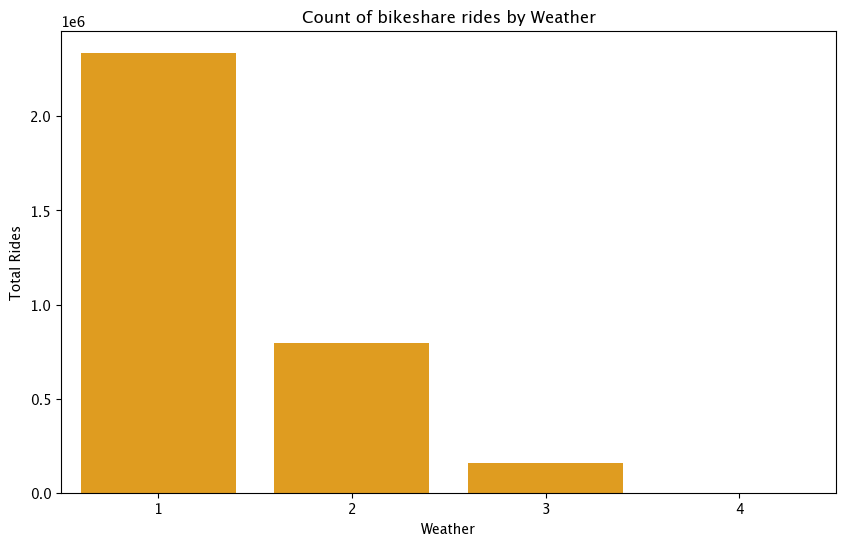

In [158]:
plt.figure(figsize=(10,6))

sns.barplot(x="weathersit", y="cnt", data=weatherly_users_df, color='orange')

plt.xlabel("Weather")
plt.ylabel("Total Rides")
plt.title("Count of bikeshare rides by Weather")

plt.show()

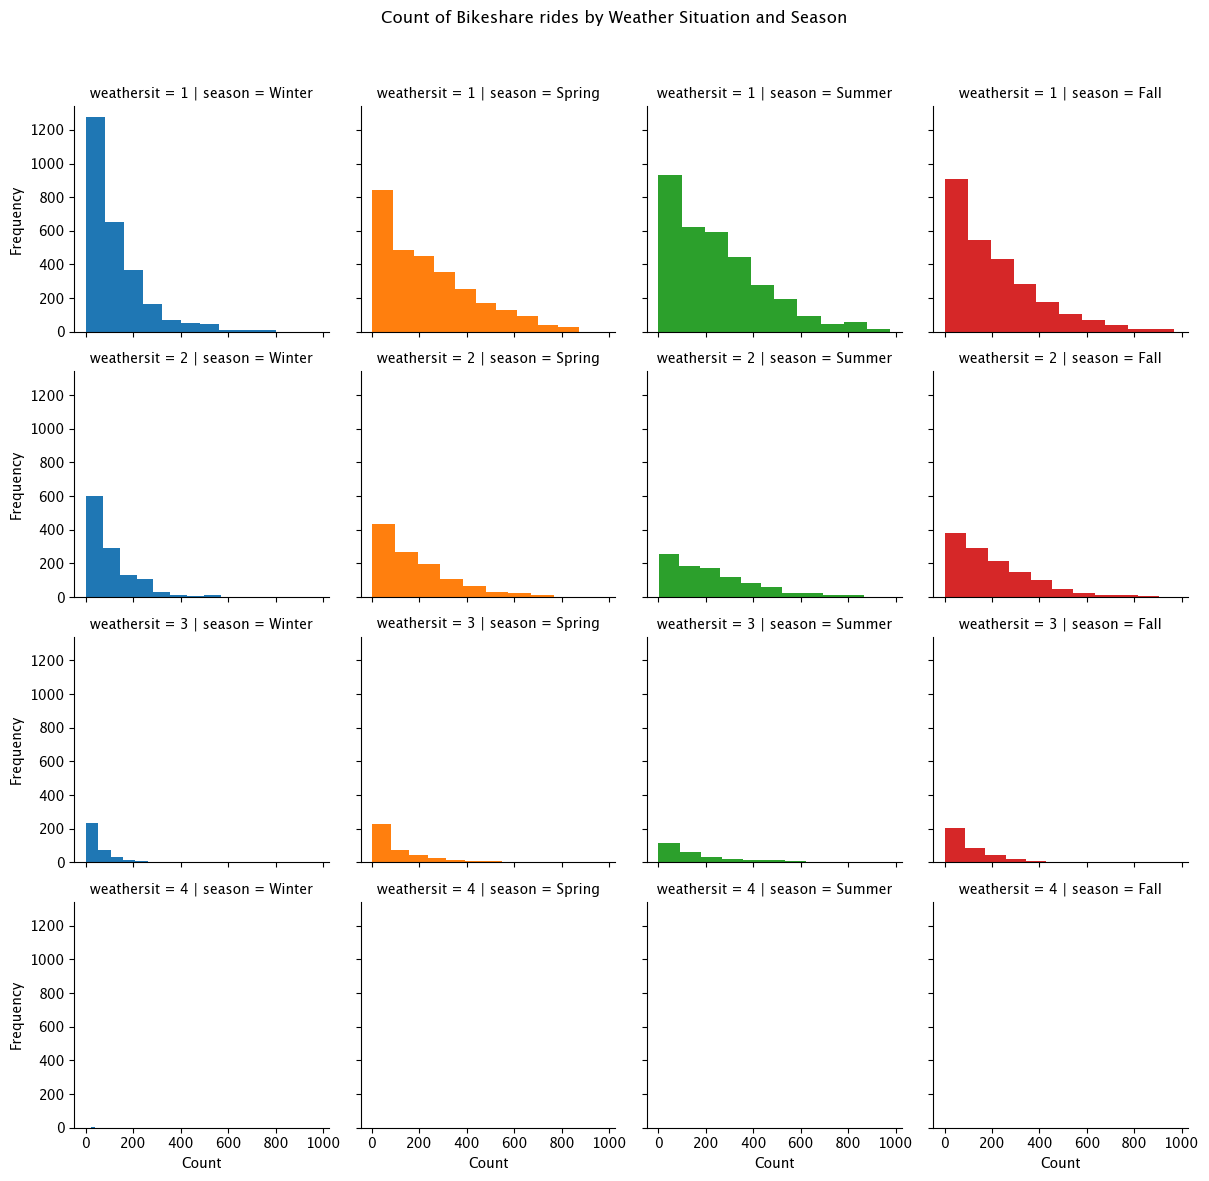

In [159]:
plt.rcParams['figure.figsize'] = [10.0, 10.0]
sns.set_context(font_scale=0.9)

g = sns.FacetGrid(data=hour_df,
               col='season',
               row='weathersit',hue='season')
g.map(plt.hist,'cnt')

plt.subplots_adjust(top=0.9)
g.fig.suptitle('Count of Bikeshare rides by Weather Situation and Season')

g.set_xlabels('Count')
g.set_ylabels('Frequency')

plt.show()

**Insight**
1. Jumlah penggunaan layanan bikeshare sangat dipengaruhi oleh kondisi cuaca. Jumlah pengguna sepeda jauh lebih sedikit saat hujan lebat dan badai petir dibandingkan dengan cuaca cerah.
2. Kondisi ini berlaku untuk semua musim.

## 7. Kesimpulan
---

### 7.1 Bagaimana tren jumlah perjalanan berbagi sepeda dalam beberapa tahun terakhir?

> Jumlah perjalanan bikeshare pada tahun 2012 lebih tinggi dibandingkan dengan tahun 2011. Kedua tahun tersebut menunjukkan tren dan musim yang sama, dengan jumlah perjalanan meningkat di pertengahan tahun dan menurun di awal dan akhir tahun.

### 7.2 Bagaimana pola penggunaan layanan bike-sharing berdasarkan waktu?

> - Untuk pengguna terdaftar, jumlah perjalanan mencapai puncaknya pada pukul 8:00 pagi dan 5:00 sore, yang menunjukkan bahwa mereka mungkin menggunakan sepeda untuk pergi ke tempat kerja. 
> - Untuk pengguna biasa, jumlah perjalanan mulai meningkat pada siang hari dan menurun pada malam hari.

### 7.3 Pada musim apa yang paling banyak digunakan untuk berbagi sepeda?

> Jumlah penumpang bikeshare paling banyak selama musim panas dan paling sedikit selama musim dingin.

### 7.4 Bagaimana pola penggunaan layanan bike-sharing berdasarkan hari dalam seminggu?

> - Untuk pengguna terdaftar, jumlah perjalanan lebih tinggi selama hari kerja. Hal ini konsisten dengan temuan pada pertanyaan nomor 2, yang menunjukkan bahwa pengguna terdaftar kemungkinan besar menggunakan sepeda untuk pergi ke kantor.
> Untuk pengguna biasa, jumlah perjalanan lebih tinggi pada akhir pekan dibandingkan dengan hari kerja, yang mengindikasikan bahwa mereka menggunakan sepeda untuk kegiatan santai di akhir pekan.

### 7.5 Apakah ada korelasi antara suhu yang mengindikasikan kondisi saat perjalanan berbagi sepeda tinggi?

> - Ya, terdapat korelasi yang sedang antara suhu dan jumlah perjalanan bikeshare.
> - Jumlah wahana paling sedikit pada suhu yang lebih dingin, yang terjadi selama musim dingin, dan mulai meningkat seiring dengan meningkatnya suhu, yang terjadi pada musim panas. Namun, ada "sweet spot" atau kisaran suhu ketika jumlah kendaraan paling tinggi, yaitu antara 20°C dan 30°C. Kisaran suhu ini biasanya terjadi selama musim panas dan musim gugur.
> - Pada hari-hari dengan kondisi suhu seperti ini, kita dapat mengharapkan jumlah wahana bikeshare menjadi tinggi.

### 7.6 Apakah cuaca mempengaruhi penggunaan bikeshare?

> Ya, jumlah wahana secara signifikan lebih tinggi saat cuaca cerah daripada saat kondisi cuaca yang lebih ekstrem.